In [1]:
import numpy as np 
import pandas as pd 
import os

# Package Import

In [2]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.1/216.1 kB 5.3 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector

from sklearn.metrics import classification_report,roc_auc_score,ConfusionMatrixDisplay,f1_score,accuracy_score
from sklearn.exceptions import NotFittedError

import tensorflow as tf

sns.set_style('darkgrid')

%matplotlib inline

# Data Import

In [4]:
input_file='/kaggle/input/water-quality/waterQuality1.csv'
df=pd.read_csv(input_file)
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [5]:
target='is_safe'

# EDA (Describe, Info)

In [6]:
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

# Null Heatmap

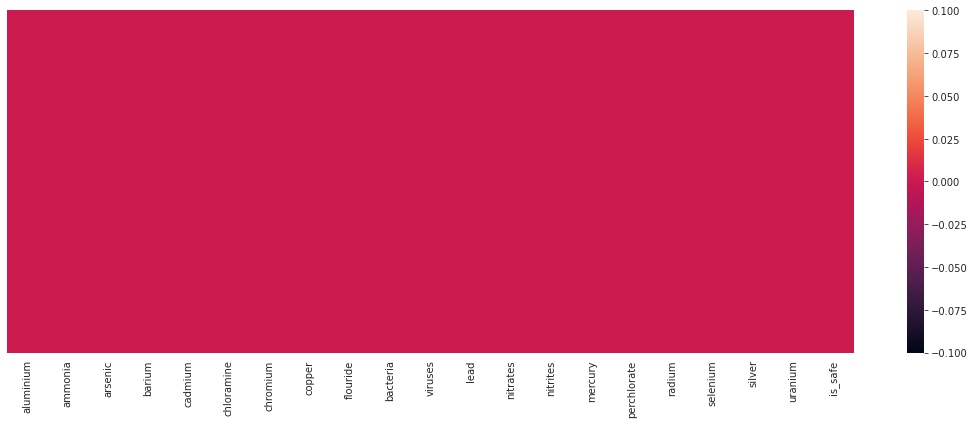

In [8]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isna(),yticklabels=False)
plt.tight_layout()

**From Kaggle data card analysis and df.info()**

In [9]:
df.loc[[7551, 7568,7890],'ammonia']

7551    #NUM!
7568    #NUM!
7890    #NUM!
Name: ammonia, dtype: object

In [10]:
df.loc[[7551, 7568,7890],'is_safe']

7551    #NUM!
7568    #NUM!
7890    #NUM!
Name: is_safe, dtype: object

In [11]:
df.drop([7551,7568,7890],axis=0,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   object 
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [13]:
df['ammonia']=df['ammonia'].astype('float64')
df['is_safe']=df['is_safe'].astype('int64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

# EDA (Corr)

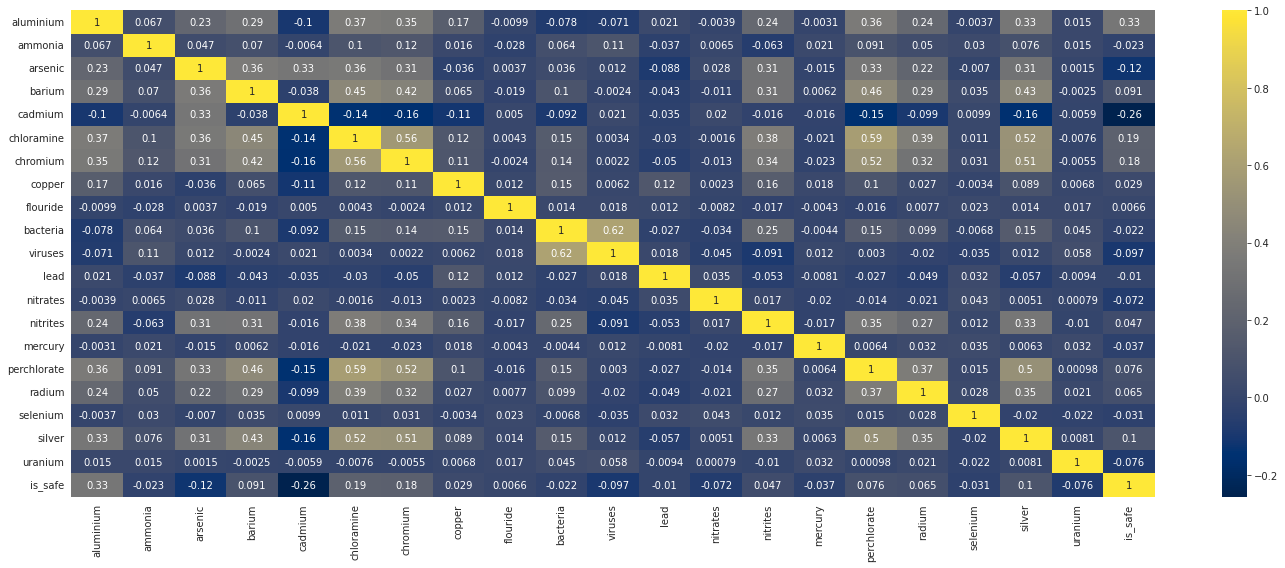

In [15]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),cmap='cividis',annot=True)
plt.tight_layout()

# EDA

In [16]:
num_col=[]
for col in df.select_dtypes(exclude='object'):
    if(col!=target):
        print(f"{col:30} ----> {df[col].nunique():10} unique values")
        num_col.append(col)

aluminium                      ---->        495 unique values
ammonia                        ---->       2563 unique values
arsenic                        ---->        107 unique values
barium                         ---->        480 unique values
cadmium                        ---->         23 unique values
chloramine                     ---->        812 unique values
chromium                       ---->         91 unique values
copper                         ---->        201 unique values
flouride                       ---->        151 unique values
bacteria                       ---->        101 unique values
viruses                        ---->         61 unique values
lead                           ---->        200 unique values
nitrates                       ---->       1803 unique values
nitrites                       ---->        280 unique values
mercury                        ---->         11 unique values
perchlorate                    ---->       2999 unique values
radium  

In [17]:
print(num_col),len(num_col)

['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']


(None, 20)

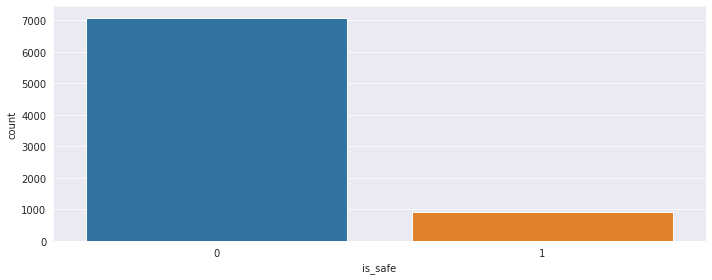

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(x='is_safe',data=df)
plt.tight_layout()

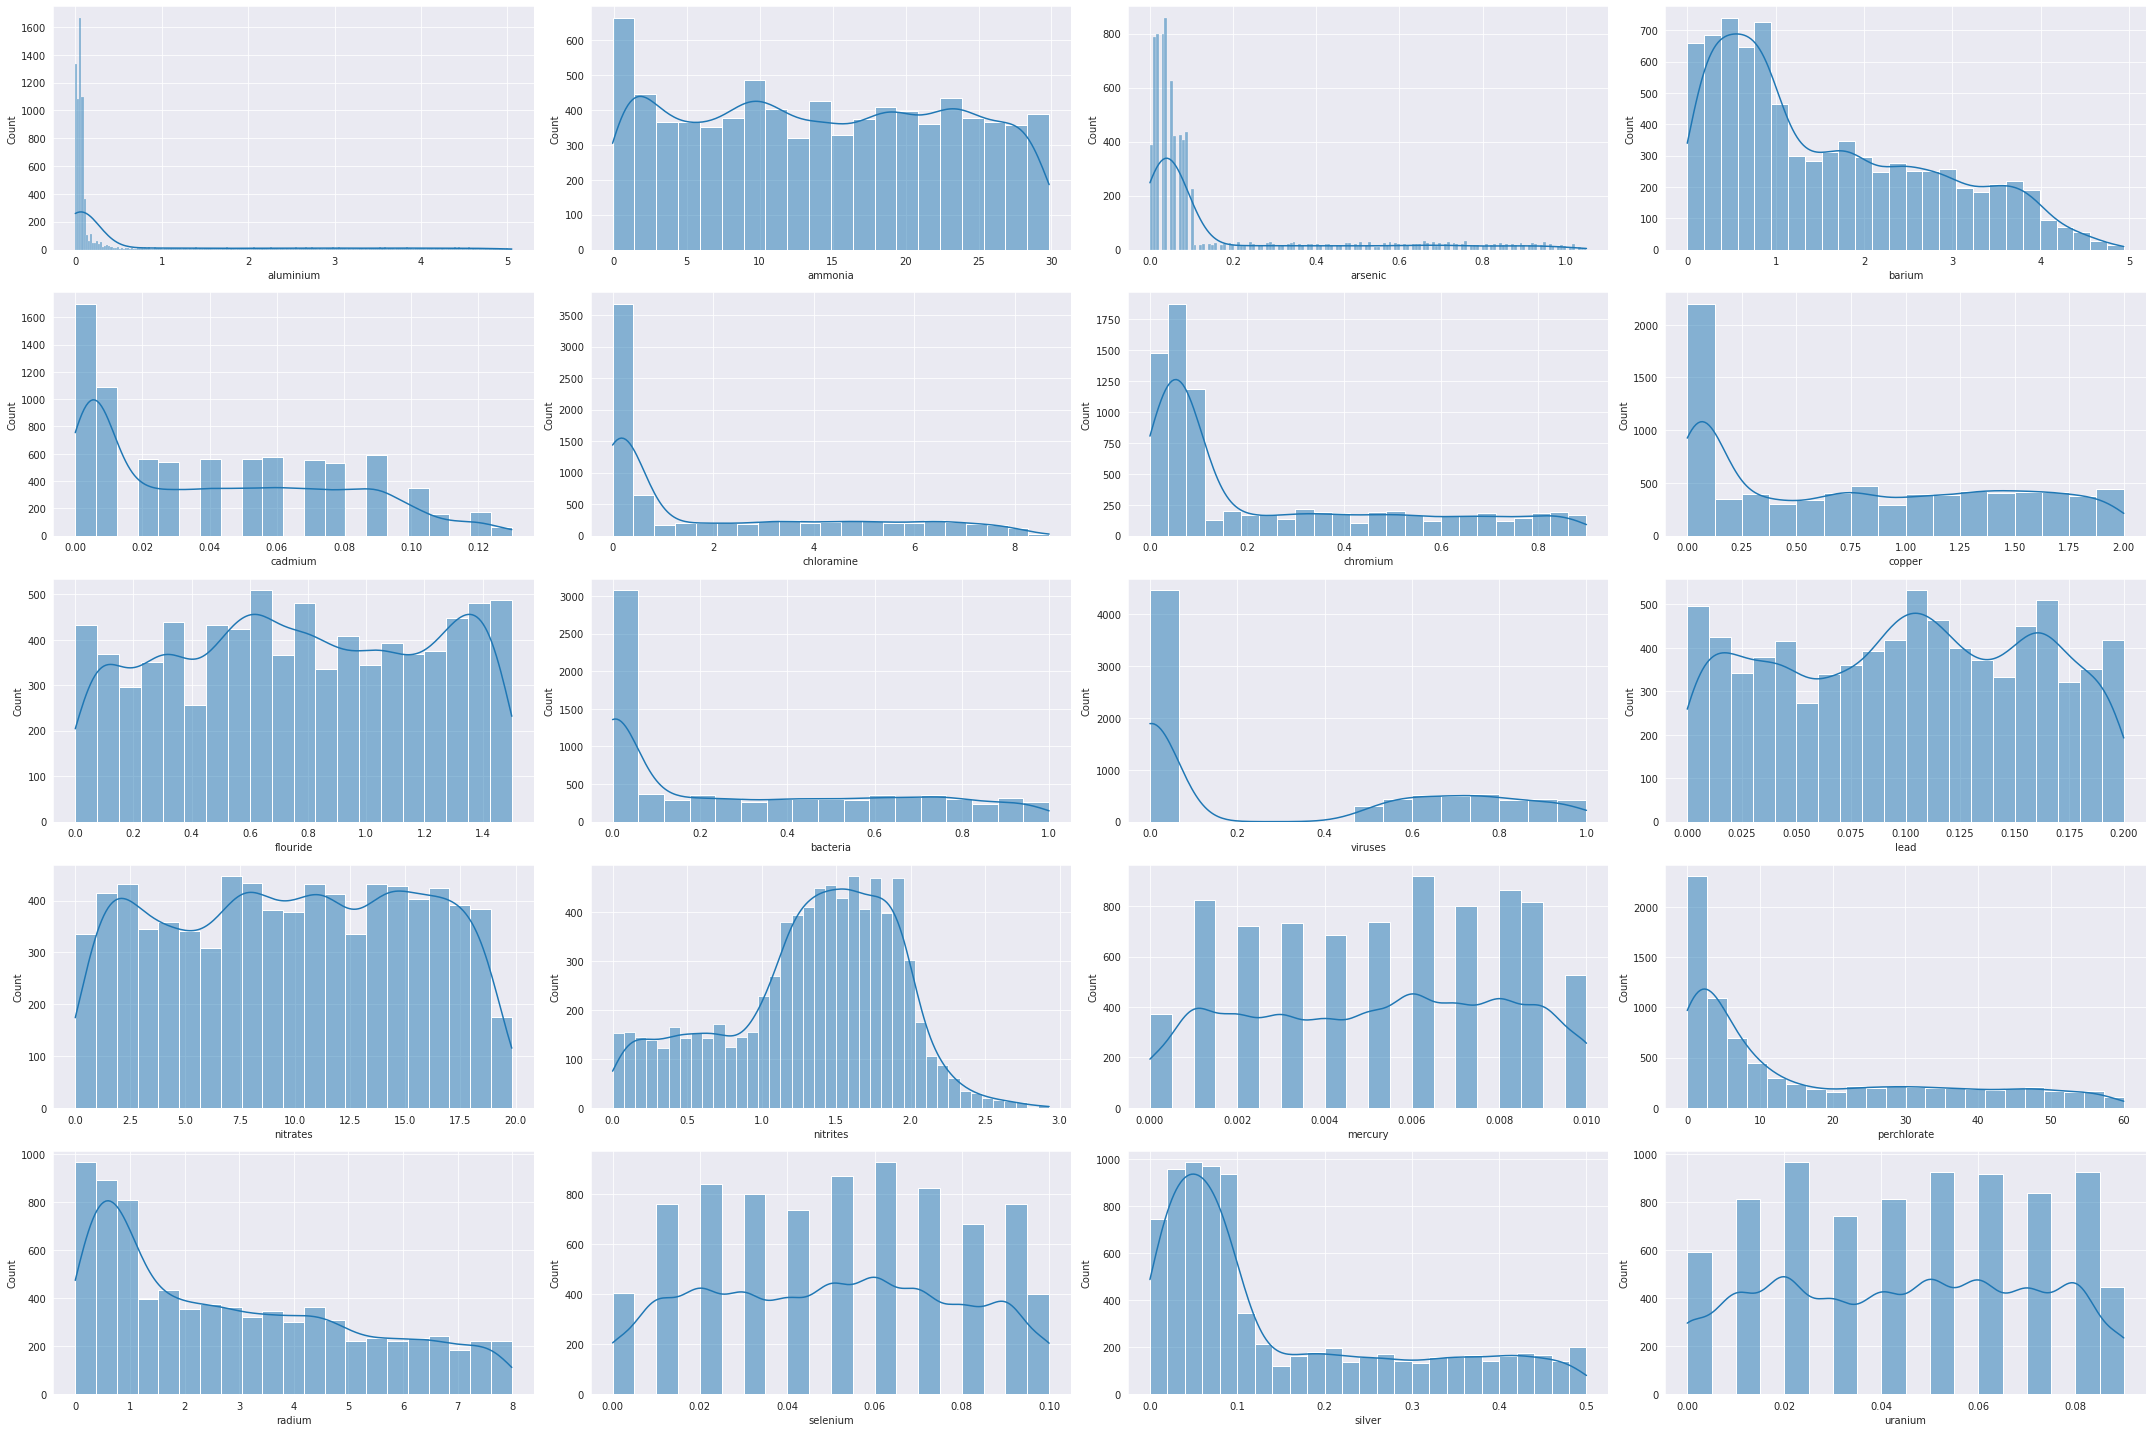

In [19]:
plt.figure(figsize=(30,20))
j=1
for i,columns in enumerate(num_col):
    plt.subplot(5,4,j)
    sns.histplot(x=columns,data=df,kde=True)
    j+=1
plt.tight_layout()

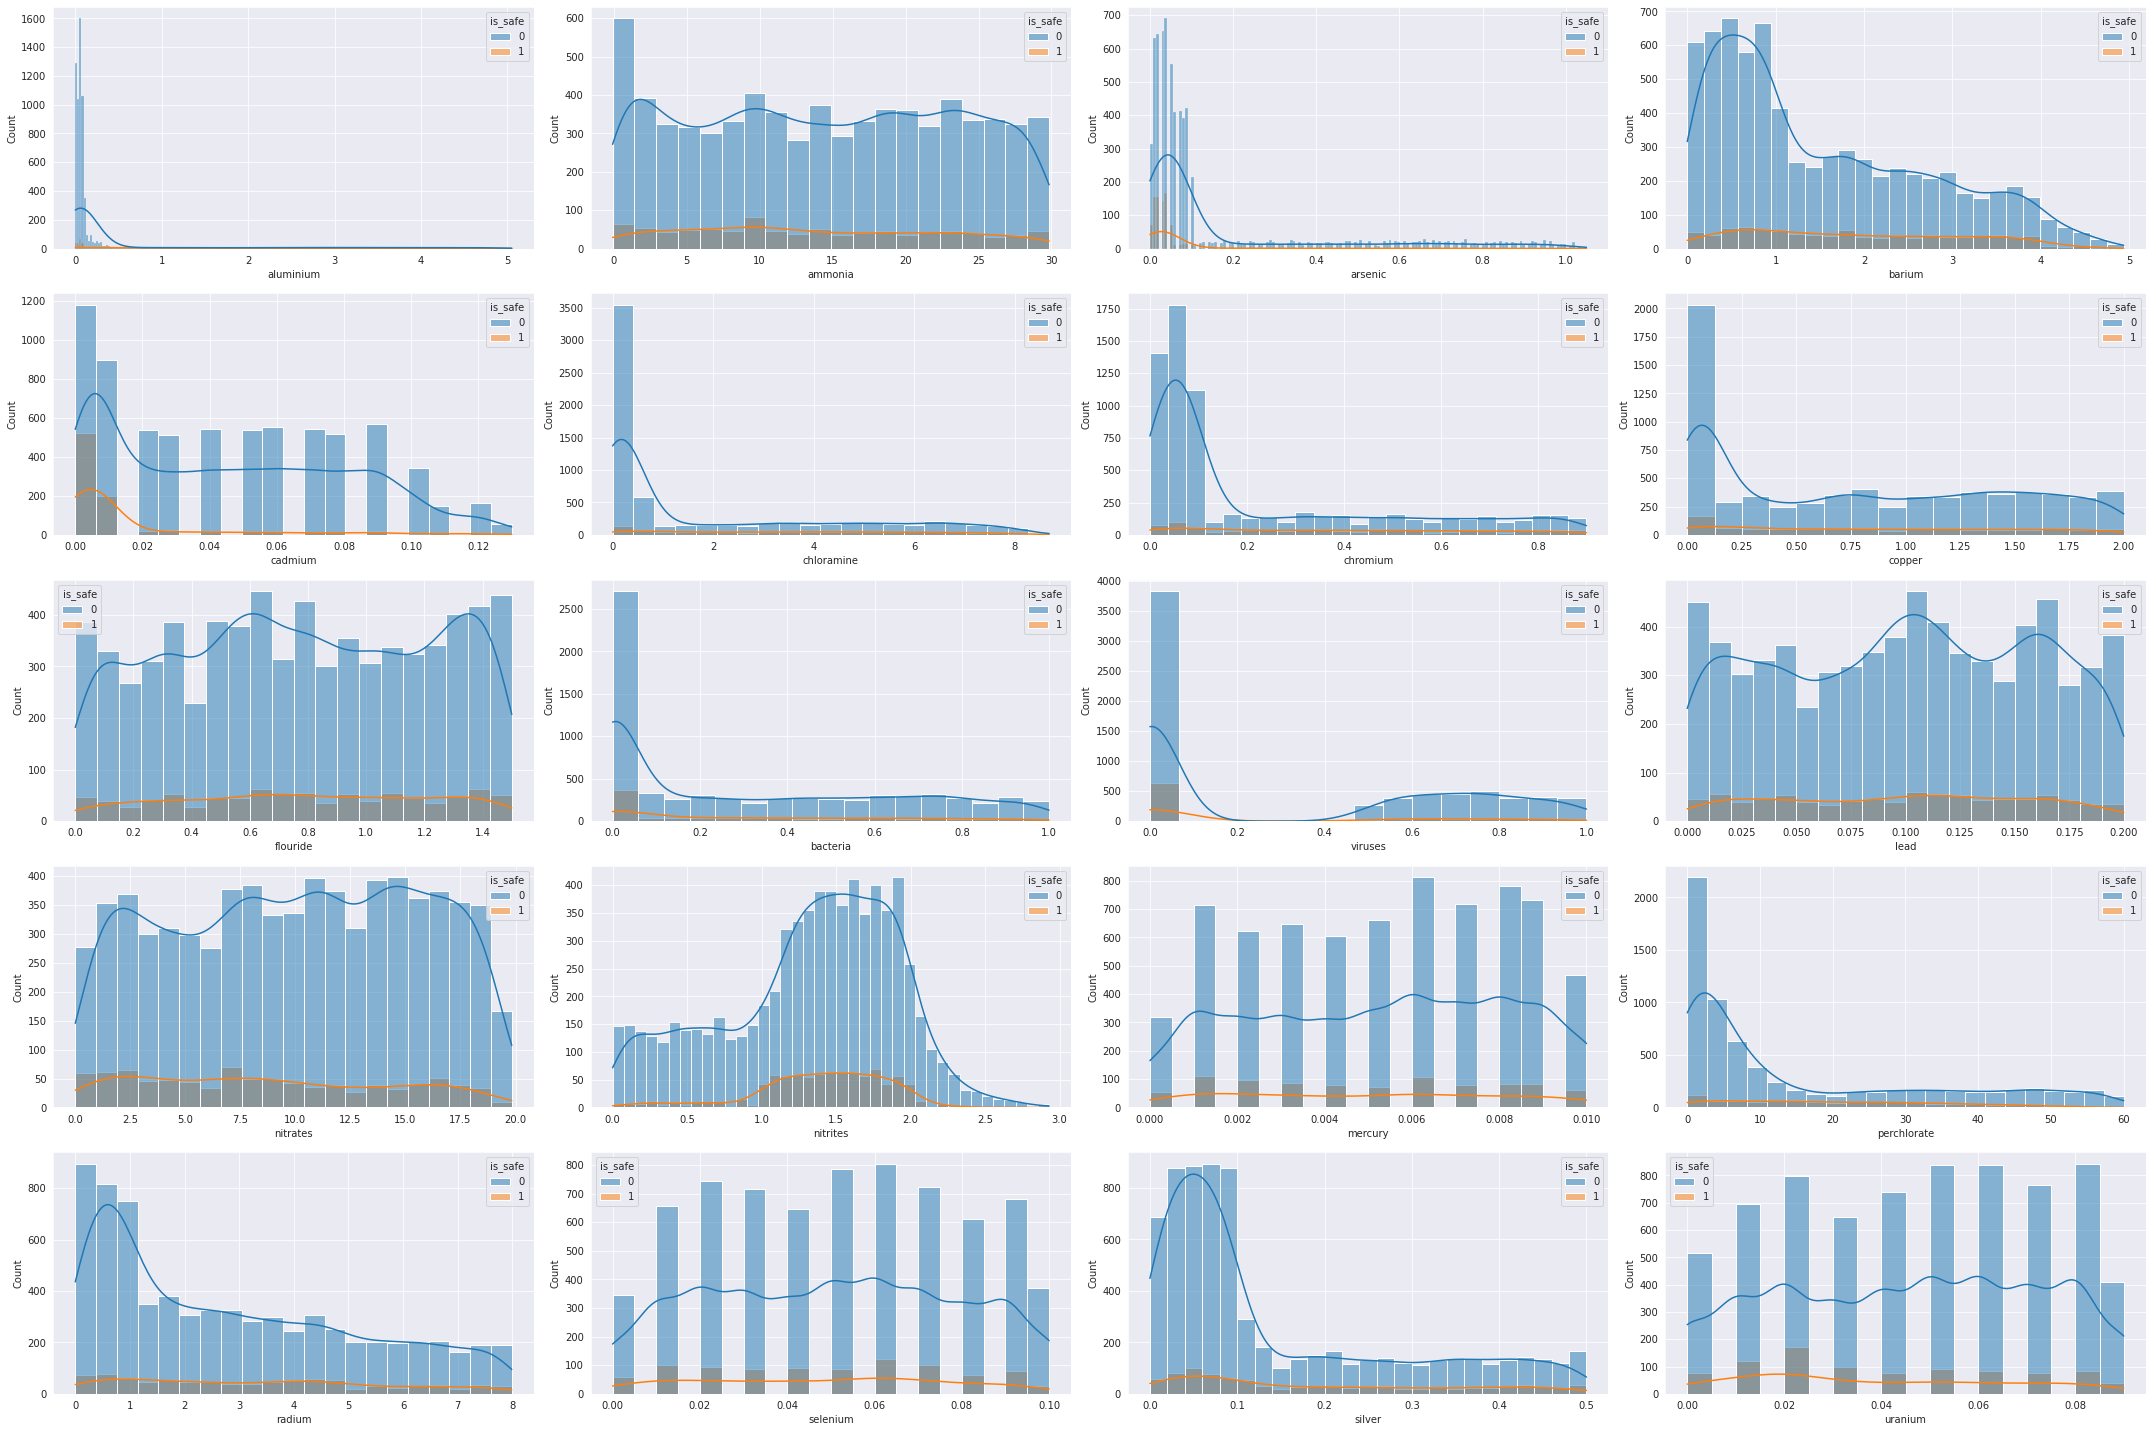

In [20]:
plt.figure(figsize=(30,20))
j=1
for i,columns in enumerate(num_col):
    plt.subplot(5,4,j)
    sns.histplot(x=columns,data=df,kde=True,hue=target)
    j+=1
plt.tight_layout()

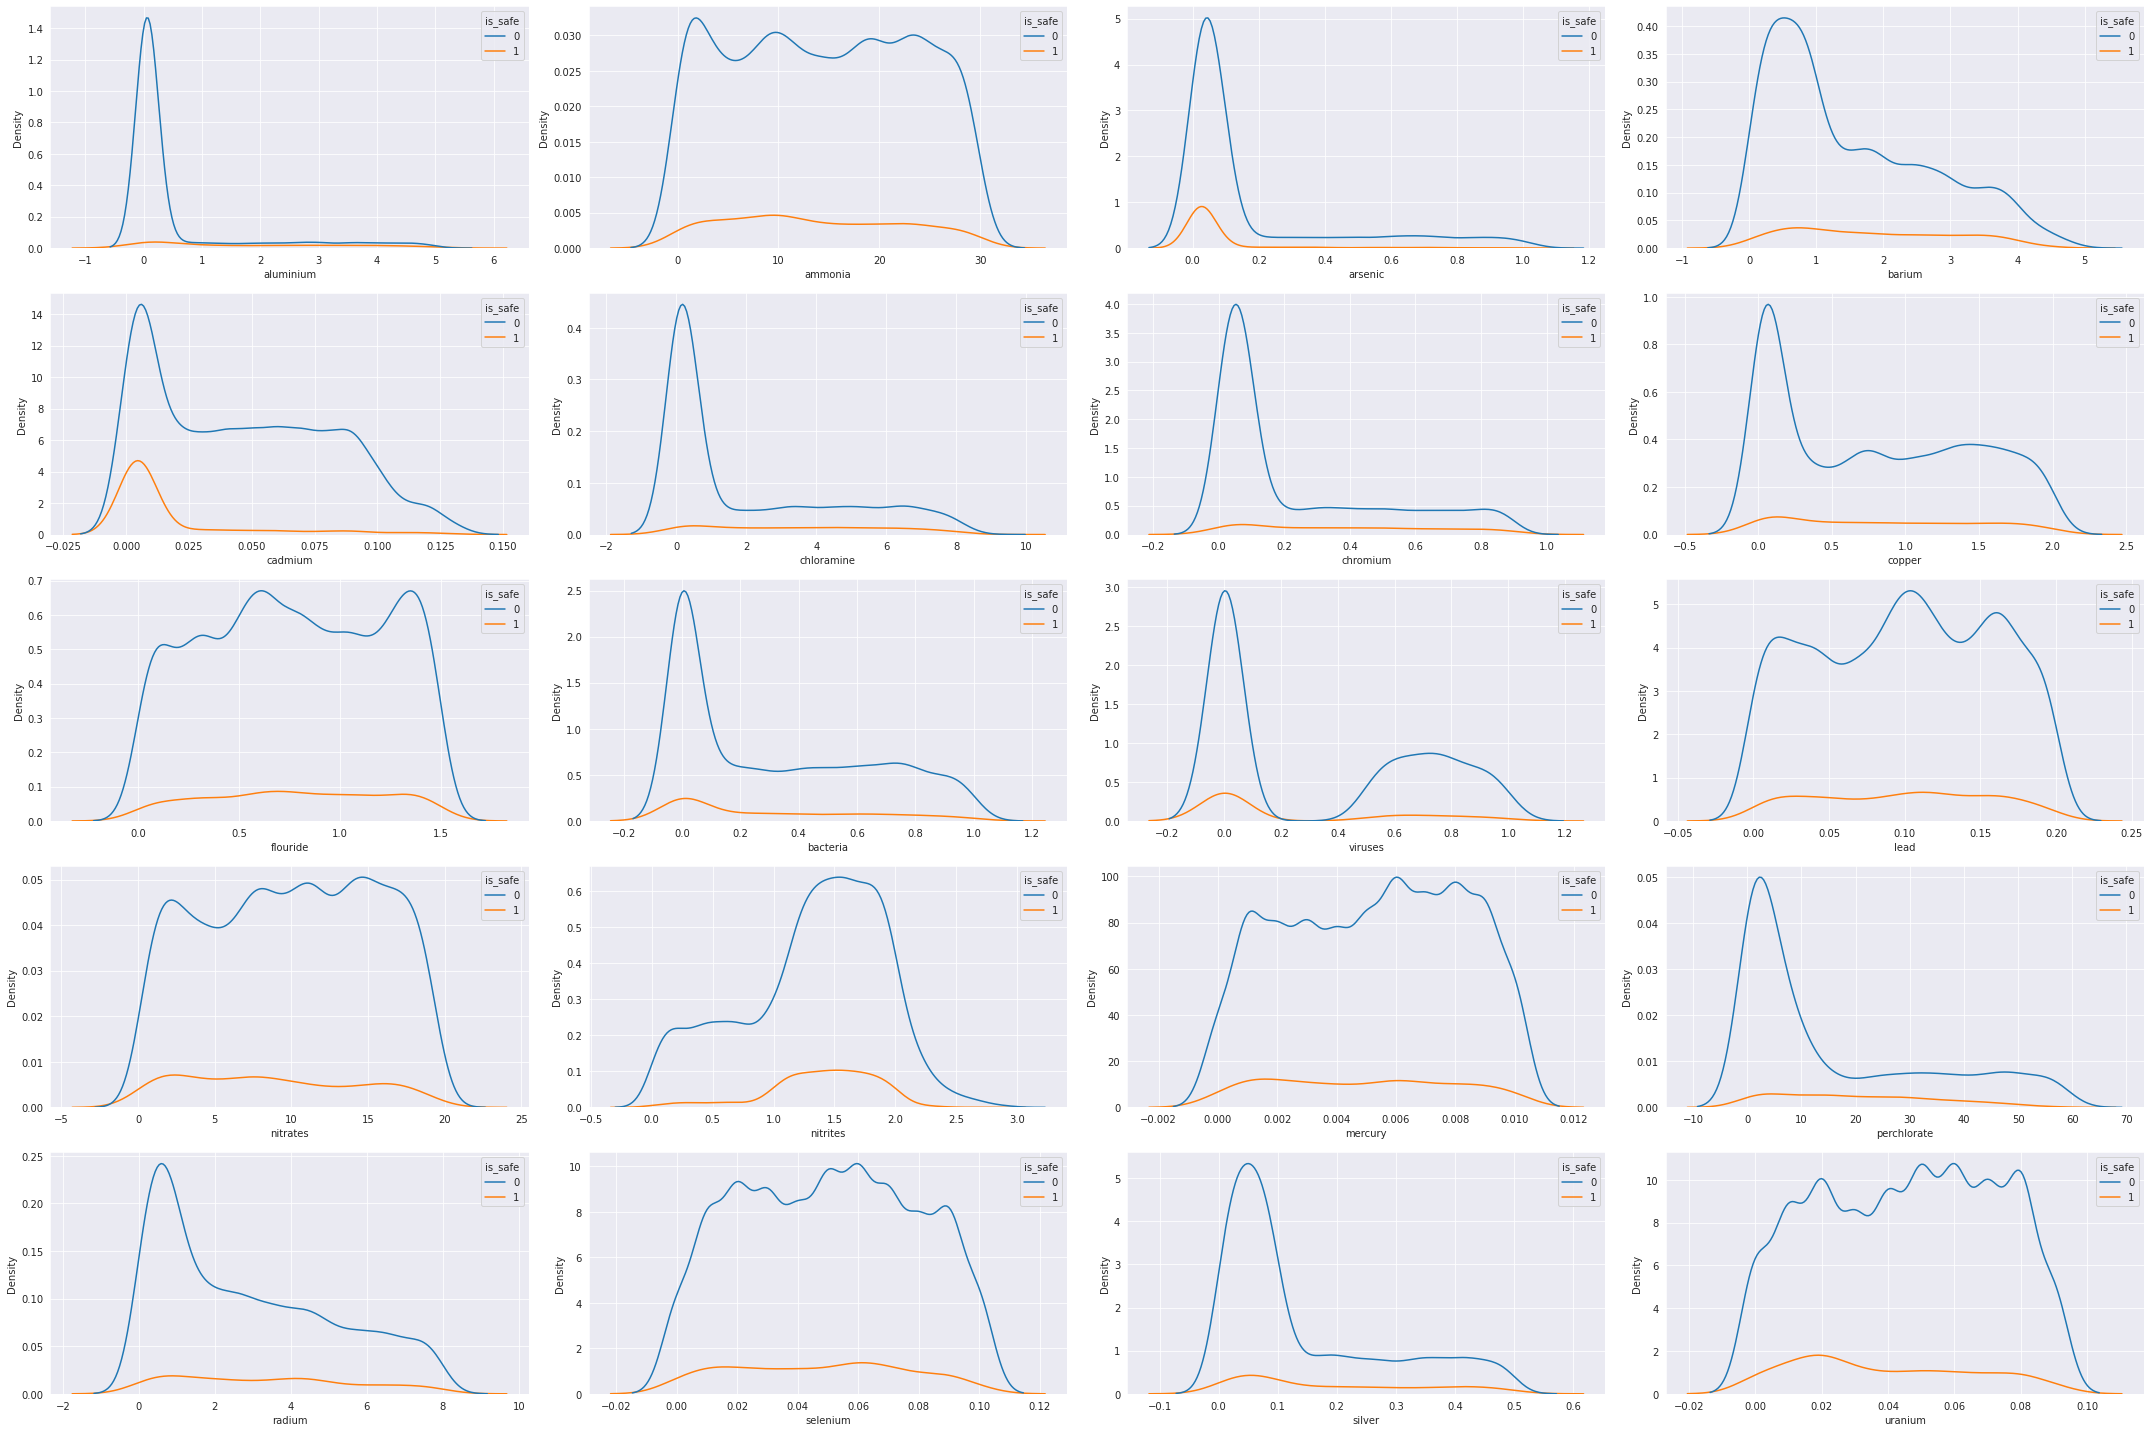

In [21]:
plt.figure(figsize=(30,20))
j=1
for i,columns in enumerate(num_col):
    plt.subplot(5,4,j)
    sns.kdeplot(x=columns,data=df,hue=target)
    j+=1
plt.tight_layout()

# Data Preprocess Pipeline

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [23]:
oh=OneHotEncoder(drop='first',handle_unknown='ignore')

ms,ss=MinMaxScaler(),StandardScaler()

ct=ColumnTransformer([
    ('num_encoder',ss,make_column_selector(dtype_include='float64'))
],remainder='passthrough',verbose=True)

# Separate X and Y

In [24]:
X=df.drop([target],axis=1)
y=df[[target]]
X.head(1)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.2,0.0,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02


In [25]:
y.head(1)

,is_safe
0,1


# Train Test Split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

In [27]:
X_train.shape,y_train.shape

((6396, 20), (6396, 1))

In [28]:
X_test.shape,y_test.shape

((1600, 20), (1600, 1))

In [29]:
X_test.head(2)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
1264,3.90,22.64,0.41,0.34,0.030,7.94,0.06,0.28,0.28,0.00,0.000,0.137,18.54,1.55,0.009,13.18,6.93,0.10,0.26,0.02
180,4.08,20.19,0.04,3.34,0.007,5.23,0.86,1.94,0.80,0.32,0.004,0.124,12.77,1.54,0.010,56.44,1.51,0.01,0.27,0.04


In [30]:
y_test.head(2)

,is_safe
1264,0
180,0


# Data Preprocess

In [31]:
X_train=ct.fit_transform(X_train)
X_test=ct.transform(X_test)

[ColumnTransformer] ... (1 of 1) Processing num_encoder, total=   0.0s


In [32]:
print("-"*50)
for i in ct.transformers_:
    print(i)
    if(i[0]!='remainder'):
        print(i[1].get_feature_names_out())   
    print("-"*50)

--------------------------------------------------
('num_encoder', StandardScaler(), ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium'])
['aluminium' 'ammonia' 'arsenic' 'barium' 'cadmium' 'chloramine'
 'chromium' 'copper' 'flouride' 'bacteria' 'viruses' 'lead' 'nitrates'
 'nitrites' 'mercury' 'perchlorate' 'radium' 'selenium' 'silver' 'uranium']
--------------------------------------------------


In [33]:
X_train.shape,y_train.shape

((6396, 20), (6396, 1))

In [34]:
tup1=None;tup2=None
try:
    tup1=(X_test[0].toarray(),y_test.head(1).values)  # scientific notation
    print("Sparse Matrix to Dense Array")
except:
    tup2=(X_test[0],y_test.head(1).values) 
    print("Normal Matrix to Dense Array")

tup1 if(tup1) else tup2

Normal Matrix to Dense Array


(array([ 2.50771793,  0.93842742,  1.00227362, -1.00815782, -0.3530224 ,
         2.23673514, -0.69161282, -0.81194719, -1.12088468, -0.96441696,
        -0.86510824,  0.63878092,  1.57191272,  0.38194575,  1.28343173,
        -0.19727399,  1.71412462,  1.74478486,  0.78725881, -0.9145732 ]),
 array([[0]]))

In [35]:
X_test.shape,y_test.shape

((1600, 20), (1600, 1))

# Model fitting

In [36]:
def print_model_locations(model_list):
    print("-"*80)
    i=0
    for model in model_list:
        print(model)
        print(f"{model.__class__.__name__:30} at index {i}")
        print("-"*80)
        i+=1

In [37]:
from flaml import AutoML

In [38]:
automl = AutoML()

clf_list=[automl]
clf_list_copy=clf_list[:]

In [39]:
print_model_locations(clf_list)

--------------------------------------------------------------------------------
AutoML(append_log=False, auto_augment=True, custom_hp={},
       cv_score_agg_func=None, early_stop=False, ensemble=False,
       estimator_list='auto', eval_method='auto', fit_kwargs_by_estimator={},
       free_mem_ratio=0, hpo_method='auto', keep_search_state=False,
       learner_selector='sample', log_file_name='', log_training_metric=False,
       log_type='better', max_iter=None, mem_thres=4294967296, metric='auto',
       metric_constraints=[], min_sample_size=10000, model_history=False,
       n_concurrent_trials=1, n_jobs=-1, n_splits=5, pred_time_limit=inf,
       preserve_checkpoint=True, retrain_full=True, sample=True,
       skip_transform=False, ...)
AutoML                         at index 0
--------------------------------------------------------------------------------


In [40]:
%%time
automl.fit(X_train, y_train.values.ravel(), task="classification",metric='roc_auc',time_budget=3600)

[flaml.automl.automl: 01-20 06:06:42] {2715} INFO - task = classification
[flaml.automl.automl: 01-20 06:06:42] {2717} INFO - Data split method: stratified
[flaml.automl.automl: 01-20 06:06:42] {2720} INFO - Evaluation method: cv
[flaml.automl.automl: 01-20 06:06:42] {2847} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.automl: 01-20 06:06:42] {2993} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.automl: 01-20 06:06:42] {3322} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 01-20 06:06:43] {3461} INFO - Estimated sufficient time budget=2455s. Estimated necessary time budget=60s.
[flaml.automl.automl: 01-20 06:06:43] {3513} INFO -  at 0.5s,	estimator lgbm's best error=0.1519,	best estimator lgbm's best error=0.1519
[flaml.automl.automl: 01-20 06:06:43] {3322} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 01-20 06:06:43] {3513} INFO -  at 0.6s,	estimator lgbm's 

# Testing

In [41]:
score_dict={};j=0

In [42]:
def tester_func(model_list):
    for i,clf in enumerate(model_list):
        
        clf_name = clf.__class__.__name__

        try:
            pred=clf.predict(X_test)
        except NotFittedError as e:
            raise(e)

        print("-"*80)
        print(f"Predicting {clf_name} done")

        score_dict[clf_name]={
            'roc_auc_score':roc_auc_score(y_test.values,pred),
            'f1_score':f1_score(y_test.values,pred),
            'accuracy_score':accuracy_score(y_test.values,pred),
            'model_index':int(i)
        }
        j=i
    
    print("-"*80)
    return j

In [43]:
j_copy=tester_func(clf_list)

--------------------------------------------------------------------------------
Predicting AutoML done
--------------------------------------------------------------------------------


In [44]:
j_copy

0

In [45]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values('f1_score',ascending=False)
score_pd

,accuracy_score,f1_score,model_index,roc_auc_score
AutoML,0.963125,0.825959,0.0,0.878621


# Best Model

In [46]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best roc_auc on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 68, 'max_leaves': 38, 'min_child_weight': 0.2136345071369568, 'learning_rate': 0.05329756004767892, 'subsample': 1.0, 'colsample_bylevel': 0.6954632504532918, 'colsample_bytree': 1.0, 'reg_alpha': 0.005806951807213521, 'reg_lambda': 0.022320446754244726}
Best roc_auc on validation data: 0.9914
Training duration of best run: 0.6231 s


In [47]:
score_pd.iloc[[0],:]

,accuracy_score,f1_score,model_index,roc_auc_score
AutoML,0.963125,0.825959,0.0,0.878621


In [48]:
win_index=int(score_pd.iloc[0,-1])
win_index

0

# Confusion matrix for Top model

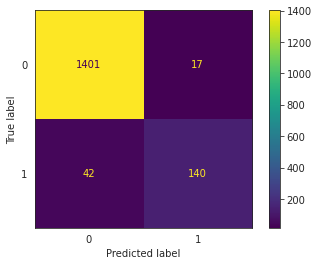

In [49]:
sns.set_style('white')
ConfusionMatrixDisplay.from_predictions(y_test.values,clf_list[win_index].predict(X_test))